In [1]:
# The following is to know when this notebook has been run and with which python version.
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Mon May 21 11:06:38 2018
3.6.1 


This is part of the Python lecture given by Christophe Morisset at IA-UNAM. More informations at: http://python-astro.blogspot.mx/


# D: How to make plots, images, 3D, etc, using Matplotlib

In [2]:
# this allows the plots to appear in the Notebook webpage:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt # this is the plotting library

Very well done tutorials on the mail Matplotlib web page: http://matplotlib.org/

#### Simple plot

 In the following cell, we plot a function

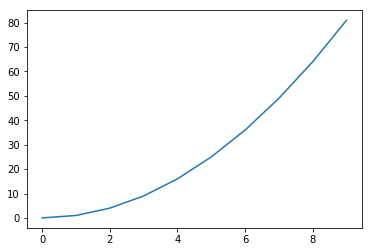

In [3]:
# Just to convince that things are easy:
x = np.arange(10) # define an array
plt.plot(x, x**2); # so quickly plotted... Notice the ";" at the end of the line -> ;

#### Controling colors and symbols

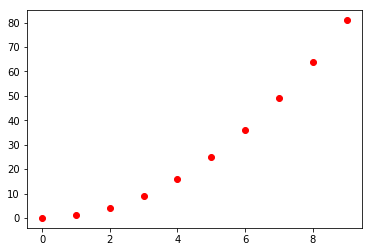

In [4]:
plt.plot(x, x**2, 'or');

#### Overplot

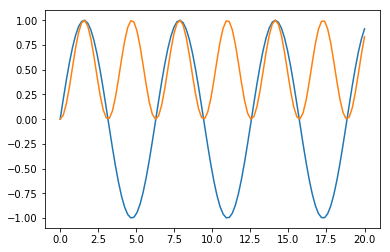

In [5]:
x = np.linspace(0, 20, 100)  # 100 evenly-spaced values from 0 to 20
y = np.sin(x)

plt.plot(x, y)
plt.plot(x, y**2); # overplot by default;

#### Fixing axes limits

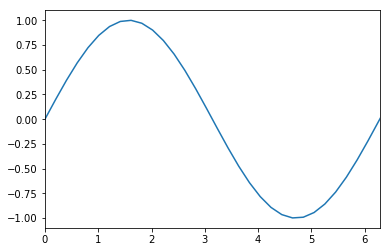

In [6]:
plt.plot(x, y)
plt.xlim(0., np.pi*2); # Take car, it's NOT plt.xlim = (1, 2), this would ERASE the xlim method from plt!!!;

#### Labels, titles

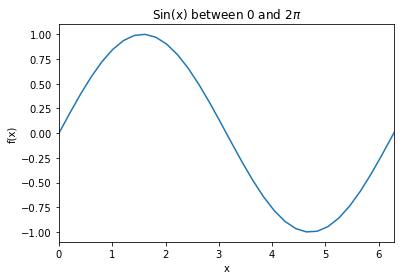

In [7]:
plt.plot(x, y)
plt.xlim((0., np.pi*2))
plt.title(r'Sin(x) between 0 and $2\pi$')
plt.xlabel('x')
plt.ylabel('f(x)');

#### Object oriented way

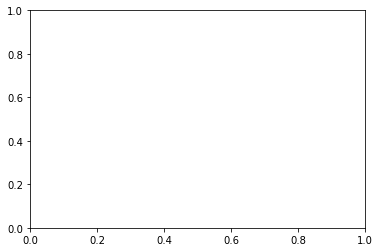

In [8]:
fig = plt.figure()  # a new figure window
ax = fig.add_subplot(1,1,1)  # specify (nrows, ncols, axnum)
#ax2 = fig.add_subplot(3, 2, 6)  # specify (nrows, ncols, axnum)
# same as ax = fig.add_subplot()

In [9]:
y1 = np.sin(x)
y2 = np.cos(x)

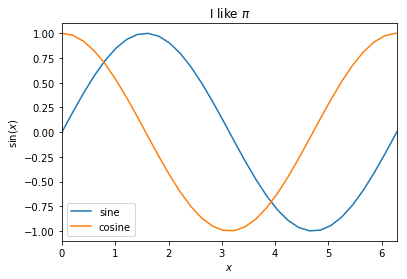

In [10]:
fig, ax = plt.subplots()  # one command way
ax.plot(x, y1)
ax.plot(x, y2)
ax.set_xlim(0., 2*np.pi)
ax.legend(['sine', 'cosine'], loc='best') # If the legends are not already defined in the plot call
ax.set_xlabel("$x$")
ax.set_ylabel("$\sin(x)$")
ax.set_title("I like $\pi$");

In [11]:
# The following outputs a HUGE quantity of information! I comment it for now
#help(ax)

#### log plots

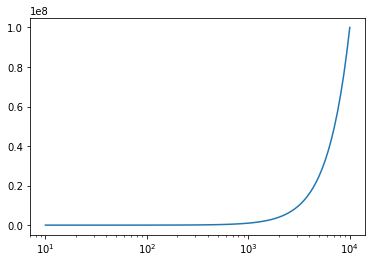

In [12]:
xl = np.logspace(1, 4, 100)
fig, ax = plt.subplots()
ax.semilogx(xl, xl**2);

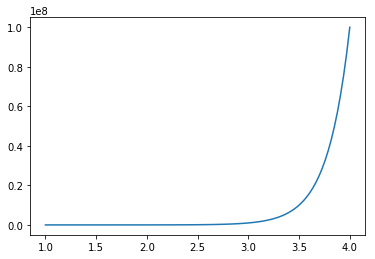

In [13]:
xl = np.logspace(1, 4, 100)
fig, ax = plt.subplots()
ax.plot(np.log10(xl), xl**2);

#### Scatter

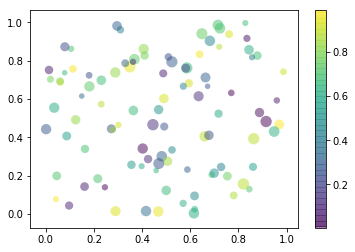

In [14]:
xr = np.random.rand(100)
yr = np.random.rand(100)
cr = np.random.rand(100)
sr = np.random.rand(100)

fig, ax = plt.subplots()
sc = ax.scatter(xr, yr, c=cr, s=30+sr*100, edgecolor='none', alpha=0.5); # Sizes and colors depend on valyues of other variables
fig.colorbar(sc);

#### multiple plots

(4, 3)


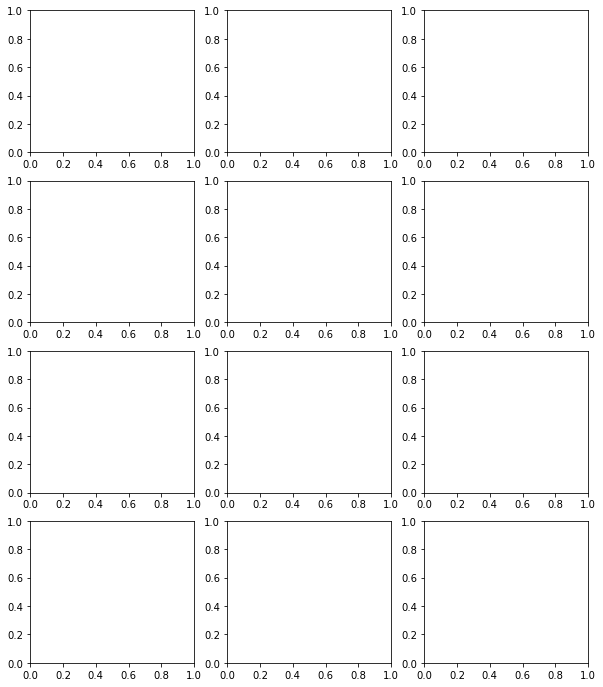

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(10,12))
print(axes.shape)

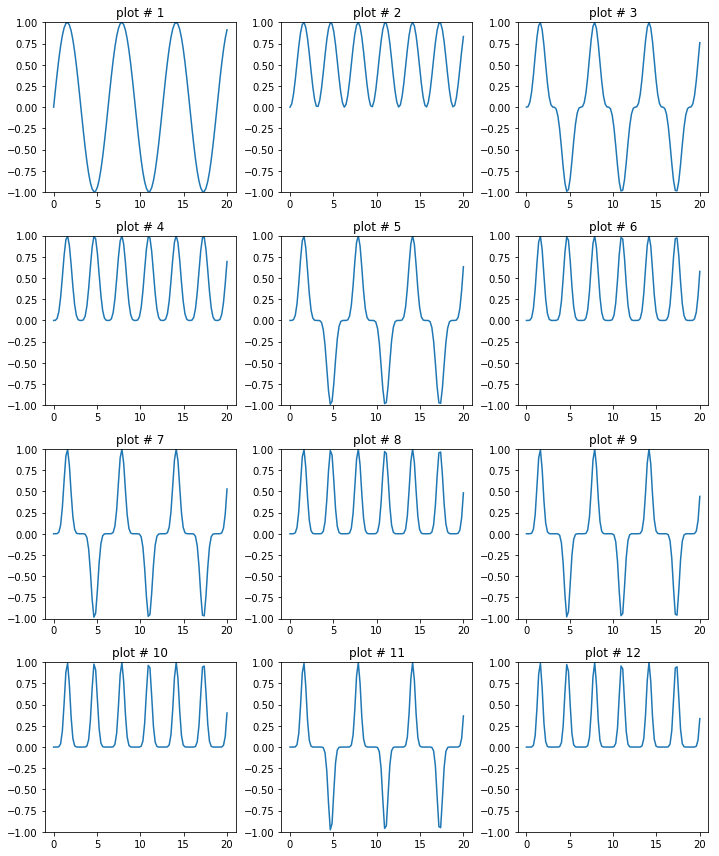

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(10,12))
for i, ax in enumerate(axes.ravel()): # axes is a 2D array.. Need to ravel it to run over every ax
    ax.set_title('plot # {}'.format(i+1))
    ax.plot(x, y**(i+1))
    ax.set_ylim((-1, 1))
fig.tight_layout() # Better output

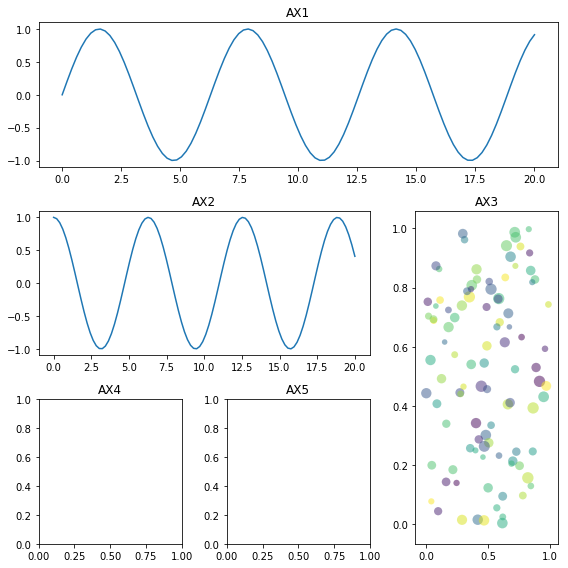

In [17]:
fig = plt.figure(figsize=(8, 8))
gs = plt.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1:, 2])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax1.plot(x, y1)
ax1.set_title('AX1')
ax2.plot(x, y2)
ax2.set_title('AX2')
ax3.scatter(xr, yr, c=cr, s=30+sr*100, edgecolor='none', alpha=0.5)
ax3.set_title('AX3')
ax4.set_title('AX4')
ax5.set_title('AX5')
fig.tight_layout()
#etc...

#### Error bars

<class 'matplotlib.container.ErrorbarContainer'>


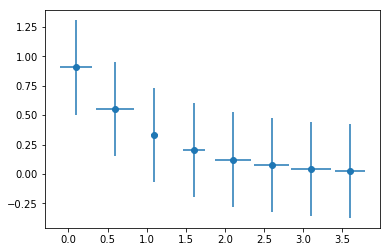

In [18]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
xerr = np.random.rand(len(x))*0.3
fig, ax = plt.subplots()
eb = ax.errorbar(x, y, xerr=xerr, yerr=0.4, fmt='o');
print(type(eb))

#### Sharing axes

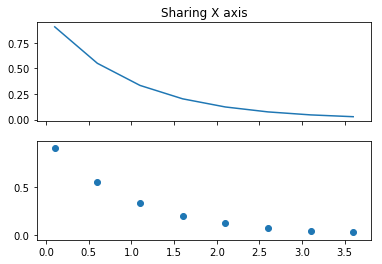

In [19]:
%matplotlib tk
fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(x, y)
axes[0].set_title('Sharing X axis')
axes[1].scatter(x, y);

#### Histograms

(array([   5.,   18.,   78.,  177.,  272.,  252.,  144.,   41.,    9.,    4.]), array([-3.31903906, -2.63759872, -1.95615839, -1.27471805, -0.59327771,
        0.08816263,  0.76960297,  1.45104331,  2.13248364,  2.81392398,
        3.49536432]), <a list of 10 Patch objects>)


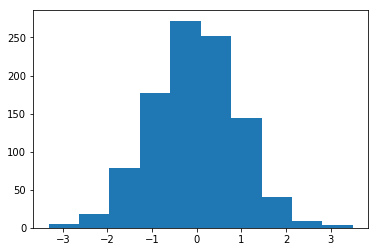

In [20]:
x = np.random.normal(size=1000)
fig, ax = plt.subplots()
H = ax.hist(x)
print(H)

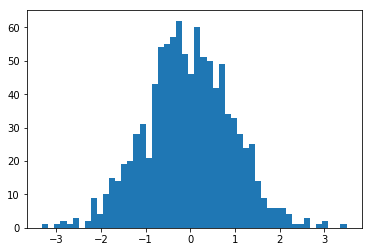

In [21]:
fig, ax = plt.subplots()
H = ax.hist(x, bins=50)

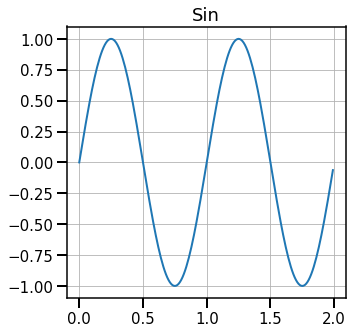

In [23]:
import matplotlib
matplotlib.rc('axes', linewidth=1.5)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('font', size=15)
matplotlib.rc('xtick.major', width=2, size=10)
matplotlib.rc('xtick.minor', width=2, size=5)
matplotlib.rc('ytick.major', width=2, size=10)
matplotlib.rc('ytick.minor', width=2, size=5)

# Define some data
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
fig, ax = plt.subplots(figsize=(5,5))

# Plot the data and keep the data-line into an object
datalines = ax.plot(t, s)
# Plot grids on the figure
ax.grid(True)
tit = ax.set_title('Sin')